In [ ]:
# Importing the pandas library for data manipulation and analysis
import pandas as pd

# Importing the numpy library for numerical operations
import numpy as np

# Importing matplotlib for creating visualizations (plots, charts)
import matplotlib.pyplot as plt

# Importing seaborn for advanced and beautiful statistical visualizations
import seaborn as sns

# Importing data transformation tools from scikit-learn
# QuantileTransformer is used to transform features to follow a uniform or normal distribution
# PowerTransformer is used to make data more Gaussian-like (normal distribution)
from sklearn.preprocessing import QuantileTransformer, PowerTransformer


In [ ]:
# load dataframe
df=pd.read_csv("/content/global_cancer_patients_2015_2024.csv")

In [ ]:
df

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54


In [ ]:
#print top 5 datapoints
df.head(3)

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84


In [ ]:
df.tail(3)

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54
49999,PT0049999,22,Male,Pakistan,2023,5.1,9.8,3.2,0.0,0.7,Liver,Stage 0,64023.82,7.4,3.76


In [ ]:
# print shape of data
df.shape

(50000, 15)

In [ ]:
# print the col names
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Country_Region', 'Year', 'Genetic_Risk',
       'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level',
       'Cancer_Type', 'Cancer_Stage', 'Treatment_Cost_USD', 'Survival_Years',
       'Target_Severity_Score'],
      dtype='object')

In [ ]:
# Loop through each column in the DataFrame
for col in df:
    # Print the column name and the number of unique values in that column
    print(col, ':', df[col].nunique())


Patient_ID : 50000
Age : 70
Gender : 3
Country_Region : 10
Year : 10
Genetic_Risk : 101
Air_Pollution : 101
Alcohol_Use : 101
Smoking : 101
Obesity_Level : 101
Cancer_Type : 8
Cancer_Stage : 5
Treatment_Cost_USD : 49861
Survival_Years : 101
Target_Severity_Score : 744


In [ ]:
# print 5 number summary
df.describe()

,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,54.421540,2019.480520,5.001698,5.010126,5.010880,4.989826,4.991176,52467.298239,5.006462,4.951207
std,20.224451,2.871485,2.885773,2.888399,2.888769,2.881579,2.894504,27363.229379,2.883335,1.199677
min,20.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5000.050000,0.000000,0.900000
25%,37.000000,2017.000000,2.500000,2.500000,2.500000,2.500000,2.500000,28686.225000,2.500000,4.120000
50%,54.000000,2019.000000,5.000000,5.000000,5.000000,5.000000,5.000000,52474.310000,5.000000,4.950000
75%,72.000000,2022.000000,7.500000,7.500000,7.500000,7.500000,7.500000,76232.720000,7.500000,5.780000
max,89.000000,2024.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99999.840000,10.000000,9.160000


In [ ]:
# print sum of null values
df.isnull().sum()

,0
Patient_ID,0
Age,0
Gender,0
Country_Region,0
Year,0
Genetic_Risk,0
Air_Pollution,0
Alcohol_Use,0
Smoking,0
Obesity_Level,0


In [ ]:
# remove all null values
df.dropna(inplace=True)

In [ ]:
# print sum of duplicate values
df.duplicated().sum()

np.int64(0)

##### outliers is shown below

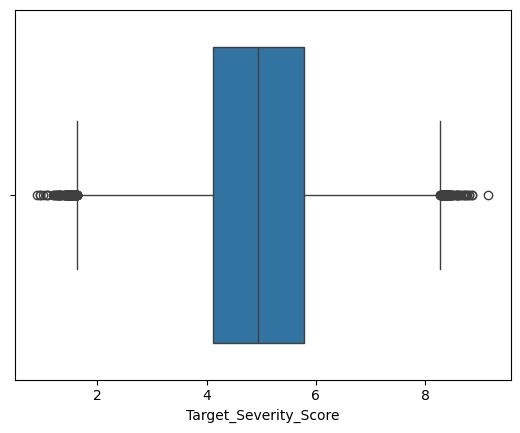

In [ ]:
sns.boxplot(x=df['Target_Severity_Score'])
plt.show()

In [ ]:
# getting the high range outiers
df[df['Target_Severity_Score']>8.2]

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
375,PT0000375,52,Male,Germany,2019,7.2,5.4,9.7,9.3,9.5,Prostate,Stage 0,9890.54,2.2,8.32
663,PT0000663,31,Other,Russia,2021,9.0,9.9,5.8,7.9,7.5,Leukemia,Stage I,6241.09,0.1,8.36
776,PT0000776,32,Other,Russia,2018,9.7,7.3,8.3,9.9,9.4,Colon,Stage IV,30436.89,9.6,8.59
1192,PT0001192,68,Male,India,2023,8.7,7.7,9.3,8.2,5.3,Skin,Stage 0,11671.46,3.5,8.23
2115,PT0002115,31,Female,Pakistan,2016,9.0,8.7,6.8,9.3,8.3,Cervical,Stage II,24846.76,4.2,8.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48459,PT0048459,89,Female,Germany,2021,8.8,9.9,9.4,9.1,9.6,Prostate,Stage I,46591.76,4.1,8.50
48661,PT0048661,37,Other,UK,2020,9.7,9.8,7.8,9.3,3.8,Liver,Stage II,20626.54,2.5,8.41
49194,PT0049194,65,Male,India,2015,8.0,9.7,10.0,8.7,9.0,Colon,Stage III,35667.70,4.6,8.48
49582,PT0049582,86,Male,China,2019,9.1,8.4,7.0,9.1,5.7,Prostate,Stage IV,14650.52,6.6,8.23


In [ ]:
# getting the low range outiers
df[df['Target_Severity_Score']<1.8]

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
127,PT0000127,63,Other,USA,2021,3.6,2.5,2.0,1.1,0.2,Liver,Stage II,93317.04,7.8,1.77
160,PT0000160,21,Male,Pakistan,2019,0.5,0.9,1.4,2.6,1.6,Cervical,Stage 0,82303.13,5.8,1.48
603,PT0000603,31,Female,India,2024,2.8,0.7,0.0,2.5,2.5,Skin,Stage I,89885.44,7.6,1.62
764,PT0000764,56,Male,Russia,2023,1.4,1.0,2.2,2.7,3.4,Breast,Stage 0,94985.50,3.7,1.74
1011,PT0001011,88,Male,UK,2016,1.2,0.3,2.4,2.0,3.1,Lung,Stage III,99974.42,2.9,1.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48044,PT0048044,55,Other,Canada,2021,2.6,3.5,0.3,0.1,1.5,Colon,Stage 0,76460.96,7.1,1.73
48057,PT0048057,31,Female,Canada,2017,3.1,1.8,1.8,1.1,0.8,Prostate,Stage III,91264.45,3.0,1.63
48209,PT0048209,24,Female,Pakistan,2022,0.2,4.2,1.7,2.3,2.2,Colon,Stage I,92430.44,8.9,1.76
49489,PT0049489,22,Other,Canada,2021,3.0,3.5,0.5,1.2,1.0,Prostate,Stage IV,88726.87,0.0,1.77


##### removing outliers by IQR

In [ ]:
#calculate IQR
Q1=df['Target_Severity_Score'].quantile(0.25)
Q3=df['Target_Severity_Score'].quantile(0.50)
IQR=Q3-Q1
print(IQR)

0.8300000000000001


In [ ]:
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

In [ ]:
#removing outliers from Target severity score column
Fixed_outlier=df[(df['Target_Severity_Score']>=lower)&(df['Target_Severity_Score']<=upper)]

In [ ]:
#drop the col having null value
df.drop('Target_Severity_Score',axis=1,inplace=True)

##### join remove outlier col with dataset

In [ ]:
# concatenate the df with outlier fixed column
DF=pd.concat([df,Fixed_outlier],axis=1)

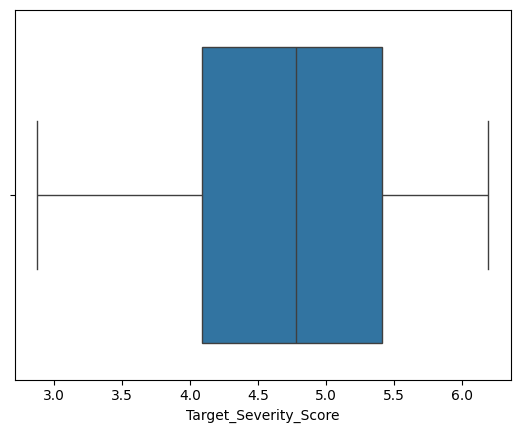

In [ ]:
# Now the outliers are removed
sns.boxplot(x=DF['Target_Severity_Score'])
plt.show()

##### remove useless features

In [ ]:
#drop the patient_ID col because target col does not have dependency on it
DF.drop(['Patient_ID'],axis=1,inplace=True)

In [ ]:
#seperating discrete and continous features using for loop
discrete_col = ['Cancer_Stage', 'Cancer_Type', 'Year', 'Gender', 'Country_Region']
continous_col = []

for col in DF:
    if col not in discrete_col and col not in continous_col:

        continous_col.append(col)

In [ ]:
DF.columns

Index(['Age', 'Gender', 'Country_Region', 'Year', 'Genetic_Risk',
       'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level',
       'Cancer_Type', 'Cancer_Stage', 'Treatment_Cost_USD', 'Survival_Years',
       'Age', 'Gender', 'Country_Region', 'Year', 'Genetic_Risk',
       'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level',
       'Cancer_Type', 'Cancer_Stage', 'Treatment_Cost_USD', 'Survival_Years',
       'Target_Severity_Score'],
      dtype='object')

In [ ]:
# converting discrete_col and continous_col to list , to avoid any err when getting columns from DF
discrete_col=list(discrete_col)
continous_col=list(continous_col)

In [ ]:
# getting discrete and continous data from DF
discrete_var=DF[discrete_col]
continous_var=DF[continous_col]


In [ ]:
# continous cols
continous_var.head(3)

,Age,Age,Genetic_Risk,Genetic_Risk,Air_Pollution,Air_Pollution,Alcohol_Use,Alcohol_Use,Smoking,Smoking,Obesity_Level,Obesity_Level,Treatment_Cost_USD,Treatment_Cost_USD,Survival_Years,Survival_Years,Target_Severity_Score
0,71,71.0,6.4,6.4,2.8,2.8,9.5,9.5,0.9,0.9,8.7,8.7,62913.44,62913.44,5.9,5.9,4.92
1,34,34.0,1.3,1.3,4.5,4.5,3.7,3.7,3.9,3.9,6.3,6.3,12573.41,12573.41,4.7,4.7,4.65
2,80,80.0,7.4,7.4,7.9,7.9,2.4,2.4,4.7,4.7,0.1,0.1,6984.33,6984.33,7.1,7.1,5.84


In [ ]:
# removing outliers = null values
continous_var.isnull().sum()

,0
Age,0
Age,9824
Genetic_Risk,0
Genetic_Risk,9824
Air_Pollution,0
Air_Pollution,9824
Alcohol_Use,0
Alcohol_Use,9824
Smoking,0
Smoking,9824


In [ ]:
continous_var.head(3)

,Age,Age,Genetic_Risk,Genetic_Risk,Air_Pollution,Air_Pollution,Alcohol_Use,Alcohol_Use,Smoking,Smoking,Obesity_Level,Obesity_Level,Treatment_Cost_USD,Treatment_Cost_USD,Survival_Years,Survival_Years,Target_Severity_Score
0,71,71.0,6.4,6.4,2.8,2.8,9.5,9.5,0.9,0.9,8.7,8.7,62913.44,62913.44,5.9,5.9,4.92
1,34,34.0,1.3,1.3,4.5,4.5,3.7,3.7,3.9,3.9,6.3,6.3,12573.41,12573.41,4.7,4.7,4.65
2,80,80.0,7.4,7.4,7.9,7.9,2.4,2.4,4.7,4.7,0.1,0.1,6984.33,6984.33,7.1,7.1,5.84


In [ ]:
# avoid the duplicates cols
continous_var=continous_var.iloc[:,0:19:2]

In [ ]:
continous_var.head(3)

,Age,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,71,6.4,2.8,9.5,0.9,8.7,62913.44,5.9,4.92
1,34,1.3,4.5,3.7,3.9,6.3,12573.41,4.7,4.65
2,80,7.4,7.9,2.4,4.7,0.1,6984.33,7.1,5.84


In [ ]:
# discrete cols
discrete_var.head(3)

,Cancer_Stage,Cancer_Stage,Cancer_Type,Cancer_Type,Year,Year,Gender,Gender,Country_Region,Country_Region
0,Stage III,Stage III,Lung,Lung,2021,2021.0,Male,Male,UK,UK
1,Stage 0,Stage 0,Leukemia,Leukemia,2021,2021.0,Male,Male,China,China
2,Stage II,Stage II,Breast,Breast,2023,2023.0,Male,Male,Pakistan,Pakistan


In [ ]:
# avoid the duplicates cols
discrete_var=discrete_var.iloc[:,0:19:2]

In [ ]:
discrete_var

,Cancer_Stage,Cancer_Type,Year,Gender,Country_Region
0,Stage III,Lung,2021,Male,UK
1,Stage 0,Leukemia,2021,Male,China
2,Stage II,Breast,2023,Male,Pakistan
3,Stage I,Colon,2015,Male,UK
4,Stage III,Skin,2017,Female,Brazil
...,...,...,...,...,...
49995,Stage 0,Leukemia,2023,Male,Pakistan
49996,Stage I,Colon,2018,Female,USA
49997,Stage 0,Breast,2015,Male,Pakistan
49998,Stage IV,Liver,2018,Male,Brazil


In [ ]:
continous_var.isnull().sum()

,0
Age,0
Genetic_Risk,0
Air_Pollution,0
Alcohol_Use,0
Smoking,0
Obesity_Level,0
Treatment_Cost_USD,0
Survival_Years,0
Target_Severity_Score,9824


In [ ]:
discrete_col

['Cancer_Stage', 'Cancer_Type', 'Year', 'Gender', 'Country_Region']

In [ ]:
#applying encoding on discrete columns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder
labl_en=LabelEncoder()
hot_en=OneHotEncoder()
ord_en=OrdinalEncoder()

discrete_var['Cancer_Stage']=labl_en.fit_transform(discrete_var['Cancer_Stage'])
discrete_var['Cancer_Type']=labl_en.fit_transform(discrete_var['Cancer_Type'])
discrete_var['Country_Region']=labl_en.fit_transform(discrete_var['Country_Region'])
discrete_var['Gender']=labl_en.fit_transform(discrete_var['Gender'])

In [ ]:
# concatenate the discrete and continous columns
combne_df=pd.concat([discrete_var,continous_var],axis=1)

#### Impute nan values with regression model technique

###### **Y_TRAIN**=without null of target_serverity_score
###### **X_TRAIN**=all other corresponding col values with respect to **Y_TRAIN**
###### **Y_test**=only null of target_serverity_score
###### **X_test**=all other corresponding col values with respect to **Y_test**

In [ ]:
#mpute nan values with regression model technique
without_null=combne_df.dropna()
X_TRAIN=without_null.drop(['Target_Severity_Score'],axis=1)
Y_TRAIN=without_null['Target_Severity_Score']

In [ ]:
# Step 1: Rows jinmein null values hain
with_null_val = combne_df[combne_df.isnull().any(axis=1)]

# Step 2: Target column save karo (before dropping nulls)
Y_test = with_null_val['Target_Severity_Score']

# Step 3: Drop nulls from features only (exclude target)
X_test = with_null_val.drop(columns=['Target_Severity_Score'])


In [ ]:
X_TRAIN.head(3)

,Cancer_Stage,Cancer_Type,Year,Gender,Country_Region,Age,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years
0,3,5,2021,1,8,71,6.4,2.8,9.5,0.9,8.7,62913.44,5.9
1,0,3,2021,1,3,34,1.3,4.5,3.7,3.9,6.3,12573.41,4.7
2,2,0,2023,1,6,80,7.4,7.9,2.4,4.7,0.1,6984.33,7.1


In [ ]:
Y_TRAIN.head(3)

,Target_Severity_Score
0,4.92
1,4.65
2,5.84


In [ ]:
X_test.head(3)

,Cancer_Stage,Cancer_Type,Year,Gender,Country_Region,Age,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years
13,2,1,2021,0,9,79,8.5,9.6,3.6,9.8,8.7,94210.93,7.1
18,2,3,2021,1,8,68,8.4,7.4,7.8,7.0,7.2,10360.20,4.6
23,1,4,2019,1,5,81,2.7,9.8,0.4,8.2,7.5,12302.14,7.2


In [ ]:
Y_test.head(3)

,Target_Severity_Score
13,NaN
18,NaN
23,NaN


In [ ]:
discrete_var.head(3)

,Cancer_Stage,Cancer_Type,Year,Gender,Country_Region
0,3,5,2021,1,8
1,0,3,2021,1,3
2,2,0,2023,1,6


#### for impute Random forest model is used

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X_TRAIN.head(3)

,Cancer_Stage,Cancer_Type,Year,Gender,Country_Region,Age,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years
0,3,5,2021,1,8,71,6.4,2.8,9.5,0.9,8.7,62913.44,5.9
1,0,3,2021,1,3,34,1.3,4.5,3.7,3.9,6.3,12573.41,4.7
2,2,0,2023,1,6,80,7.4,7.9,2.4,4.7,0.1,6984.33,7.1


In [ ]:
# training the model
Rndm_frst=RandomForestRegressor(n_estimators=100, random_state=42)
model=Rndm_frst.fit(X_TRAIN,Y_TRAIN)

In [ ]:
# predicting which value replace which null value
prediction=model.predict(X_test)

In [ ]:
# converting prediction array into pandas series
prediction = pd.Series(prediction, index=Y_test.index)

###### filling the null values

In [ ]:
# these null values were created when we remove outliers by IQR
combne_df.isnull().sum()

In [ ]:
# Now replacing the null values in Target_serverity_score with prediction values
combne_df['Target_Severity_Score'] = combne_df['Target_Severity_Score'].fillna(prediction)

In [ ]:
combne_df.isnull().sum()

In [ ]:
continous_var.shape

In [ ]:
continous_var.head(3)

In [ ]:
combne_df.head(3)

In [ ]:
combne_df.isnull().sum()

In [ ]:
print("DF shape:", combne_df.shape)
print("discrete_col:",discrete_col )

In [ ]:
# getting all datapoints with cols from 0 index to 4
combne_df_disc=combne_df.iloc[:,0:5]

In [ ]:
for i in combne_df.columns:
  print(f"{i} : unique values = {combne_df[i].nunique()},dtype {combne_df[i].dtypes},")

In [ ]:
discrete_col

In [ ]:
continous_col

In [ ]:
combne_df.head(3)

In [ ]:
discrete_var.head(3)

In [ ]:
continous_var.head(3)

In [ ]:
# getting continous variable from remoed outlier and null fixed dataset
conti_var_clean=combne_df[continous_col]

In [ ]:
# create sample data for visualize bcz dataset took to much time
sample_data=conti_var_clean.sample(10000)

In [ ]:
conti_var_clean.isnull().sum()

In [ ]:
sample_data

In [ ]:
print("Discrete cols:", discrete_var.columns.tolist())
print("Continuous cols:", continous_var.columns.tolist())


In [ ]:
# normalizing daata
from sklearn.preprocessing import StandardScaler
std_scl=StandardScaler()
conti_var_clean[continous_var.columns]=std_scl.fit_transform(conti_var_clean)

In [ ]:
conti_var_clean.head(3)

In [ ]:
#create dopy of df so that original continous data not effect
conti_var_clean_cpy = conti_var_clean.copy()


In [ ]:
# Apply Box-Cox transformation to continuous columns
pt = PowerTransformer(method='box-cox', standardize=False)

for col in conti_var_clean_cpy.columns:
    if (conti_var_clean_cpy[col] <= 0).any():
        shift = abs(conti_var_clean_cpy[col].min()) + 1
        conti_var_clean_cpy[col] = conti_var_clean_cpy[col] + shift

    conti_var_clean_cpy[col] = pt.fit_transform(conti_var_clean_cpy[[col]])

In [ ]:
conti_var_clean_cpy.columns

In [ ]:
# try multiple transformation to find best fit for this model
# choose one which converts distribution into guassian curve
# see distribution of different transformation using visualization through histplot
BoxCox_trans=[]
yeo_johnson_trans=[]
for i in conti_var_clean_cpy.columns:

    quant_trans = QuantileTransformer(output_distribution='normal')
    box_cox_trans = PowerTransformer(method='box-cox',standardize=False)
    yeo_johnson_trans=PowerTransformer(method='yeo-johnson',standardize=False)


    conti_var_clean_cpy[i] = quant_trans.fit_transform(conti_var_clean_cpy[[i]])
    conti_var_clean_cpy[i] = box_cox_trans.fit_transform(conti_var_clean_cpy[[i]]+6)
    conti_var_clean_cpy[i] = yeo_johnson_trans.fit_transform(conti_var_clean_cpy[[i]])


In [ ]:
conti_var_clean_cpy

### visualizing the Quantile transformation distribution

---





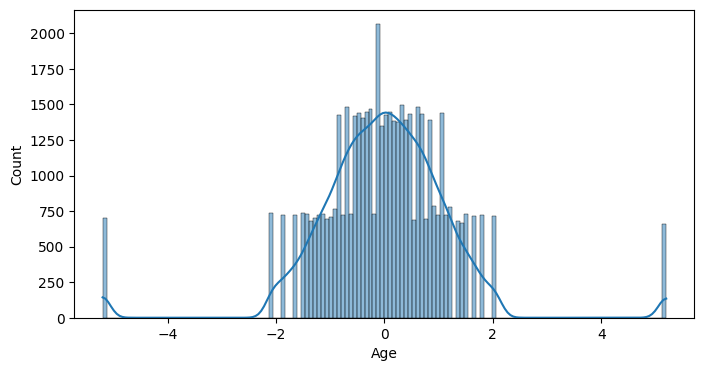

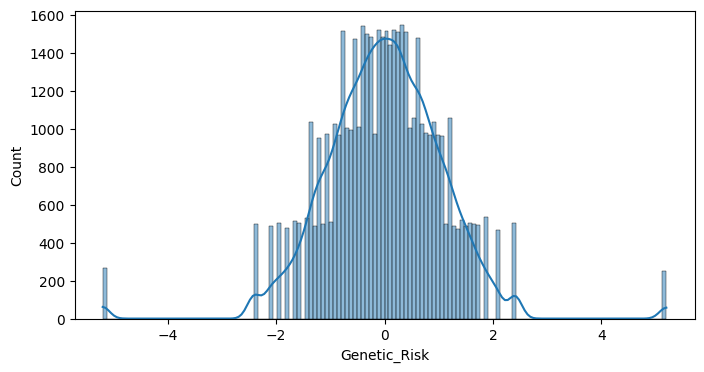

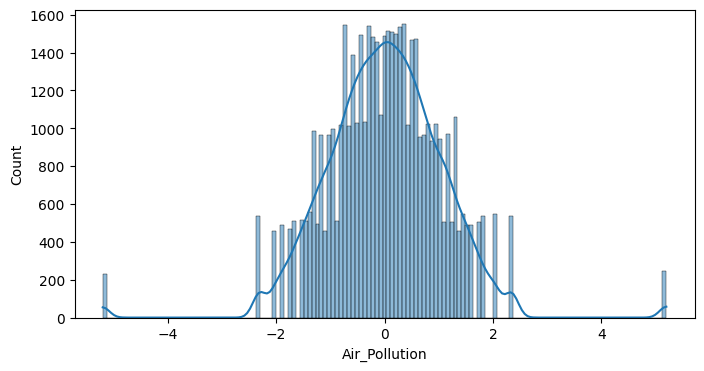

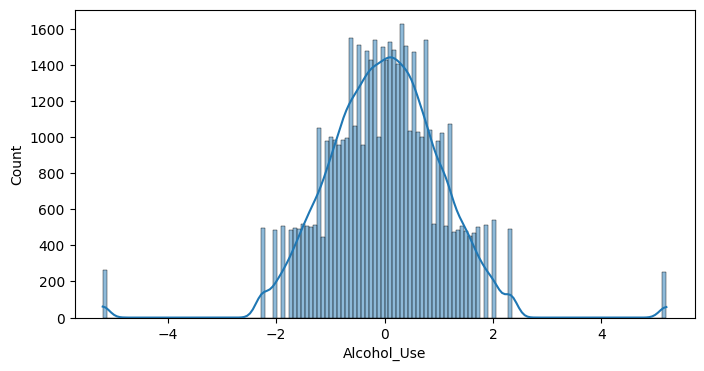

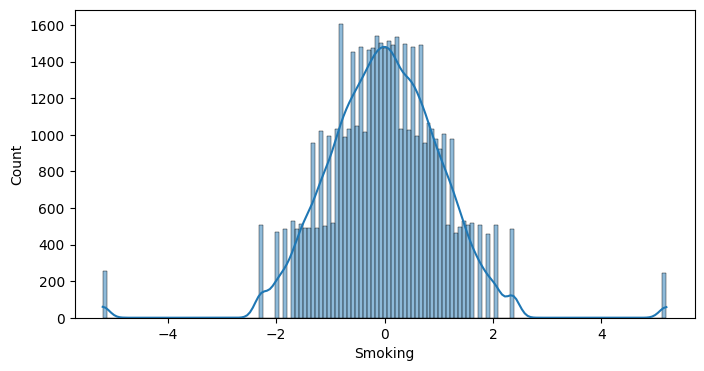

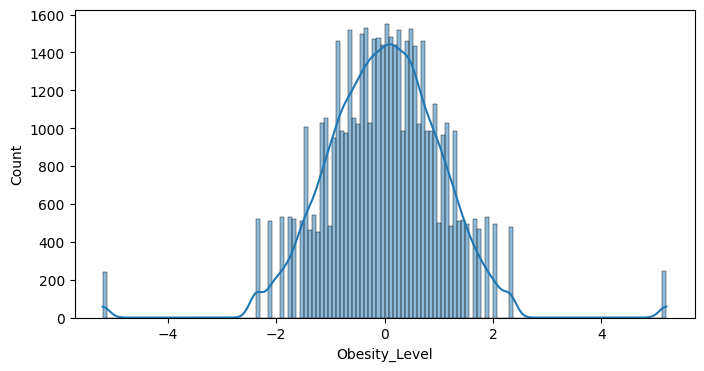

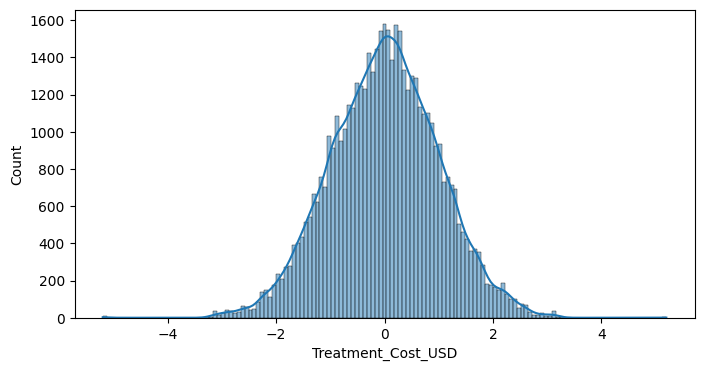

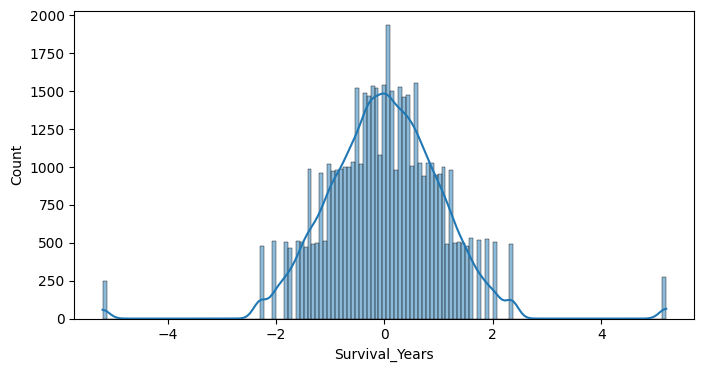

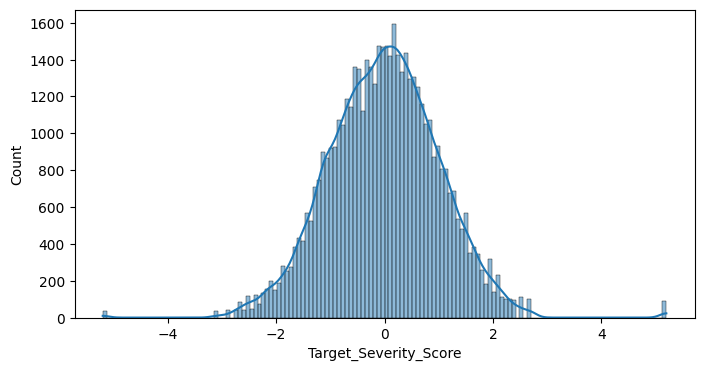

In [ ]:
# visualize the distribution of continous cols
for i in conti_var_clean_cpy.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(x=conti_var_clean_cpy[i],kde=True)
    plt.show()

##### Now It is  perfectly distributed ( gaussian bell curve )

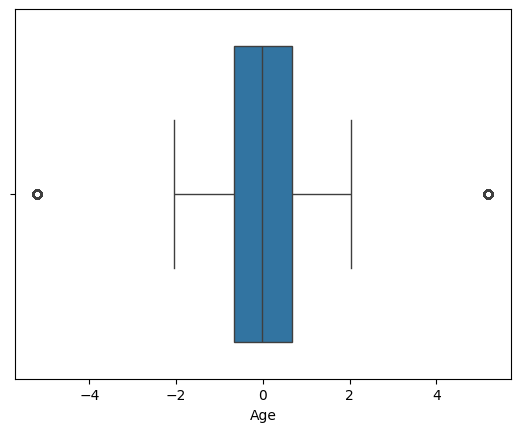

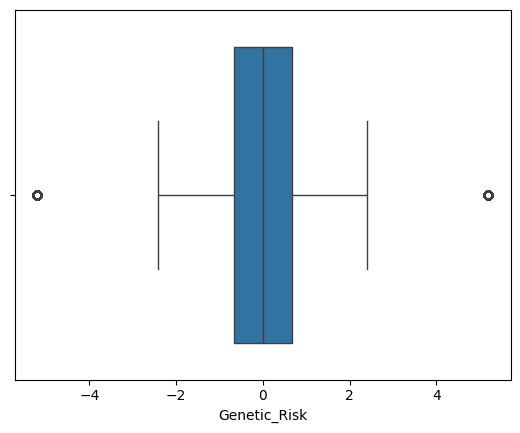

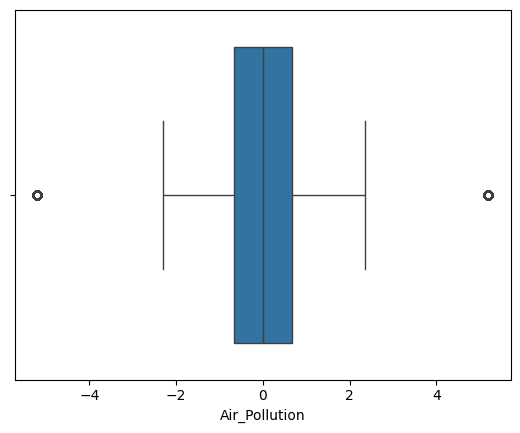

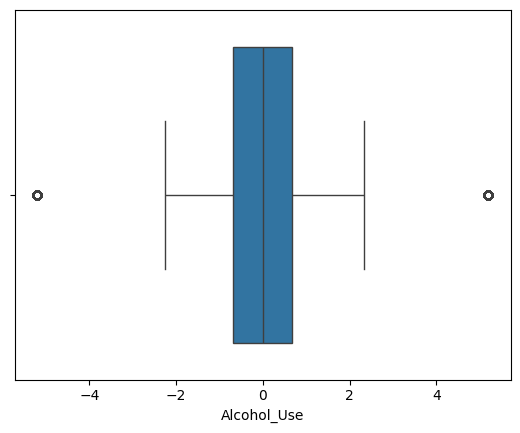

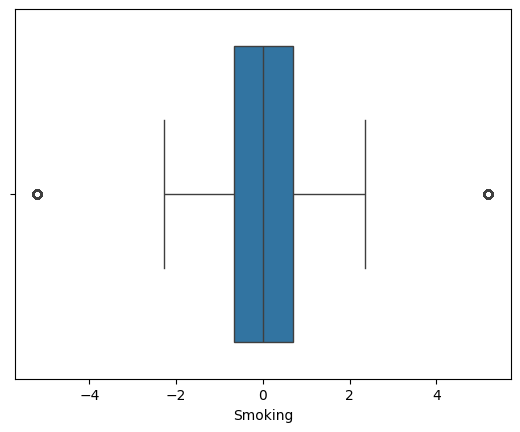

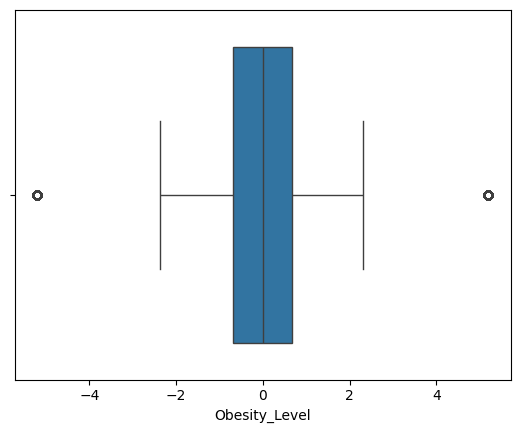

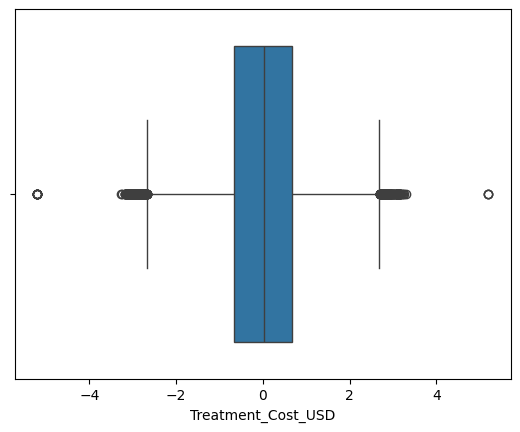

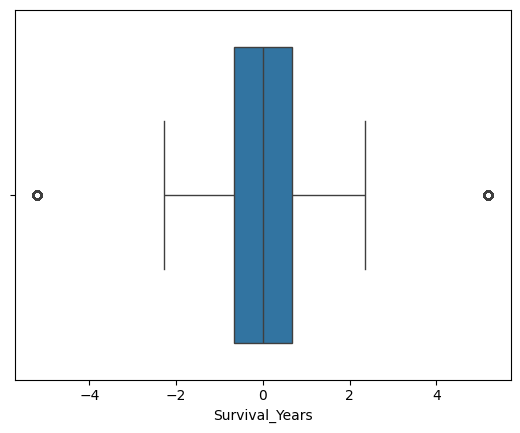

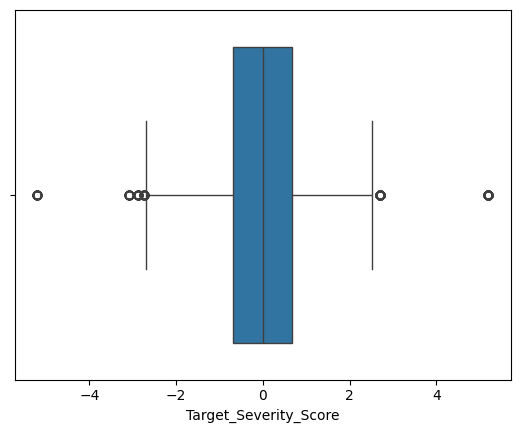

In [ ]:
 #visualize the data and see is there any outliers
for i in conti_var_clean_cpy.columns:
    sns.boxplot(x=i,data=conti_var_clean_cpy)
    plt.show()

In [ ]:
conti_var_clean_cpy.isna().sum()

,0
Age,0
Genetic_Risk,0
Air_Pollution,0
Alcohol_Use,0
Smoking,0
Obesity_Level,0
Treatment_Cost_USD,0
Survival_Years,0
Target_Severity_Score,0


### Linear Regression
#### From splitting data to Graphical loss representation

In [ ]:
from sklearn.model_selection import train_test_split

#split: train and test
x_train, x_test, y_train, y_test = train_test_split(df_final.drop('Target_Severity_Score', axis=1), df_final['Target_Severity_Score'], test_size=0.2, random_state=42)

NameError: name 'df_final' is not defined

In [ ]:
# training linear regression model
from sklearn.linear_model import LinearRegression
lnReg=LinearRegression()
train_model=lnReg.fit(x_train,y_train)

In [ ]:
# predict target variable using linear regression
prediction=train_model.predict(x_test)

In [ ]:
#calculating err in Linear Regression
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, prediction)
print(f"Mean Squared Error Linear Regression: {mse}")

# Calculate R-squared
r2 = r2_score(y_test, prediction)
print(f"R-squared Linear Regression: {r2}")

In [ ]:
# visualize the Actual vs Prediction graph
import seaborn as sns
import matplotlib.pyplot as plt

# X = independent variable, Y = actual target values
sns.regplot(x=y_test, y=prediction, line_kws={"color": "red"})
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted | linear Regression")
plt.show()

### Random Forest
#### From splitting data to Graphical loss representation

In [ ]:
from sklearn.model_selection import train_test_split

# First split: train and temp
X_train, X_test, Y_train, Y_test= train_test_split(df_final.drop('Target_Severity_Score', axis=1), df_final['Target_Severity_Score'], test_size=0.2, random_state=42)

In [ ]:
# train linear regression model
from sklearn.ensemble import RandomForestRegressor
Rndm_frst=RandomForestRegressor(n_estimators=500, random_state=42)
Forest_model=Rndm_frst.fit(X_train,Y_train)

In [ ]:
# predict target variable using Random Forest
frtPrediction=Forest_model.predict(X_test)

In [ ]:
# calculating the err in Random Forest
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error
mse = mean_squared_error(Y_test, frtPrediction)
print(f"Mean Squared Error in Random Forest: {mse}")

# Calculate R-squared
r2 = r2_score(Y_test, frtPrediction)
print(f"R-squared in Random Forest: {r2}")

In [ ]:
# visualize the Actual vs Prediction graph
import seaborn as sns
import matplotlib.pyplot as plt

# X = independent variable, Y = actual target values
sns.regplot(x=Y_test, y=frtPrediction, line_kws={"color": "red"})
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted | Random Forest")
plt.show()